# Team 12 - Project One - Census Data

Our goal is to conduct predictive analysis and determine if the income of a random adult American citizen is based on given features, such as age, education, occupation, gender, race, work week, native region, family status, etc. We want to predict when a person will earn more than or less than 50,0000 dollars a year.

## Step 1:  Clean and transform the input dataset

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# Read the dataset
replaced_df = pd.read_csv("replaced.csv", delimiter=',', skipinitialspace=True)
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32526,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32527,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32528,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


## Income
Income is the response variable, also called dependent variable 

In [16]:
# Overview of income
replaced_df["income"].value_counts()
under_50k = replaced_df[replaced_df["income"] == "<=50K"]
over_50k = replaced_df[replaced_df["income"] == ">50K"]

<=50K    24691
>50K      7839
Name: income, dtype: int64

## Age

In [17]:
# Overview of age
replaced_df["age"].value_counts()

36    898
31    888
34    886
23    875
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [170]:
replaced_df["age"].min()
under_50k["age"].min()
over_50k["age"].min()

17

In [172]:
replaced_df["age"].max()
under_50k["age"].max()
over_50k["age"].max()

90

In [174]:
replaced_df["age"].median()
under_50k["age"].median()
over_50k["age"].median()

34.0

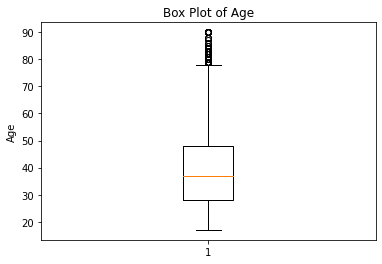

In [177]:
# Look at age data set and compute quantiles
age = replaced_df["age"]
age1 = under_50k["age"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.set_ylabel('Age')
ax1.boxplot(age)
plt.show()

In [22]:
# Get quartile calculations
quartiles = age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of age is: {lowerq}")
print(f"The upper quartile of age is: {upperq}")
print(f"The interquartile range of age is: {iqr}")
print(f"The the median of age is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of age is: 28.0
The upper quartile of age is: 48.0
The interquartile range of age is: 20.0
The the median of age is: 37.0 
Values below -2.0 could be outliers.
Values above 78.0 could be outliers.


In [23]:
# Create the bins in which age will be held
# Bins are 0, 17, 22, 33, 40, 57, 65, 78, 99   
bins = [0, 17, 22, 33, 40, 57, 65, 78, 99]

# Create the names for the age bins
group_labels = ["< 18", "18-22", "23-33", "34-40", "41-57", "58-65", "66-78", "> 78"]

In [24]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Age Category"] = pd.cut(replaced_df["age"], bins, labels=group_labels)

In [25]:
# Preview the dataset with the Age Category
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65


In [167]:
# Creating a group based off of the Age Category
age_income = replaced_df[["Age Category", "income"]]
age_count = age_income.groupby(["Age Category", "income"]).agg(age_count = ("Age Category", 'count'))
age_group = replaced_df["Age Category"].value_counts()
age_group

41-57    10072
23-33     9259
34-40     5952
18-22     3489
58-65     2207
66-78     1015
< 18       394
> 78       142
Name: Age Category, dtype: int64

In [155]:
for value in Age Category:
    

In [168]:
percent_age = age_count/age_group.sum()
percent_age

age_count
Age Category income           
18-22        <=50K    0.106702
             >50K     0.000553
23-33        <=50K    0.246911
             >50K     0.037719
34-40        <=50K    0.126345
             >50K     0.056625
41-57        <=50K    0.191423
             >50K     0.118199
58-65        <=50K    0.047126
             >50K     0.020719
66-78        <=50K    0.024808
             >50K     0.006394
< 18         <=50K    0.012112
> 78         <=50K    0.003597
             >50K     0.000769

In [166]:
#x axis is age, y axis is % above 50k
#x_axisu = []
#x_axiso = [] 

#Calculate percentage making more/less than 50k per age group 
# 
#underage18_22 = underage18_22.loc[underage18_22["Age Category"] == "18-22"]
#underage18_22
# age18_income = age18_22["income"].value_counts()
# age18_income.plot(kind="pie", autopct="%1.1f%%")

#total_count = len(replaced_df.index)

#Make a line plot of percentages by age group

#ver_age = age_count.loc[age_count["income"] == ">50K"]
#percent_age = age_count/age_group
#percent_age
#under_50k = replaced_df[replaced_df["income"] == "<=50K"]


#age_merge = pd.merge(age_count, age_group, on="Age Category", how="outer")
# percent_age = pd.DataFrame({"Age Category": "Age Category",
#                            "Count": age_count,
#                            "Group Count": age_group})
# percent_age
# age_df = ({"Age Category": "Age Category",
#           #"Income": income,
#           "Count": age_count,
#           "Percent": percent_age})
# age_df
#age_merge

KeyError: 'income'

## Sex

In [51]:
# Overview of sex
replaced_df["sex"].value_counts()

Male      21770
Female    10760
Name: sex, dtype: int64

In [65]:
# Export replaced_df as a CSV, without the Pandas index, but with the header
replaced_df.to_csv("replaced.csv", index=False, header=True)

## Store the cleaned and transformed CSV into DataFrame

Load the csv exported in Step 1 a DataFrame

In [66]:
# File to Load
clean_data_to_load = "replaced.csv"

In [67]:
# Read the cleaned and transformed census data and store into Pandas DataFrames
replaced_df2 = pd.read_csv(clean_data_to_load, encoding="utf-8")
replaced_df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States


In [68]:
replaced_df2["occupation"].isnull().values.any()

False

## Step 2:  Preliminary analysis to understand the impact of each predictor on income

### Age Category

In [69]:
# Creating a group based off of the Age Category
age_category_group = replaced_df.groupby(["Age Category", "income"], as_index=False)
age_category_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Age Category,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,< 18,<=50K,17.000000,6.649746,109.969543,41.857868,21.345178
1,< 18,>50K,NaN,NaN,NaN,NaN,NaN
2,18-22,<=50K,20.120714,9.202247,71.911265,37.433593,31.901181
3,18-22,>50K,21.500000,9.444444,19529.388889,156.888889,45.888889
4,23-33,<=50K,27.777266,9.997759,123.877864,47.012824,40.543825
5,23-33,>50K,29.781581,11.567237,3132.493073,178.602282,46.220049
6,34-40,<=50K,36.833820,9.858394,175.702433,58.370560,42.088321
7,34-40,>50K,37.116721,11.684582,3201.186211,182.365364,46.429425
8,41-57,<=50K,47.736470,9.594187,157.873936,62.366469,41.574595
9,41-57,>50K,47.885046,11.675943,4285.849935,204.830169,45.822887


In [70]:
# Age Category count
age_category_group[["age",]].count()

,Age Category,income,age
0,< 18,<=50K,394.0
1,< 18,>50K,NaN
2,18-22,<=50K,3471.0
3,18-22,>50K,18.0
4,23-33,<=50K,8032.0
5,23-33,>50K,1227.0
6,34-40,<=50K,4110.0
7,34-40,>50K,1842.0
8,41-57,<=50K,6227.0
9,41-57,>50K,3845.0


### Sex

In [89]:
# Creating a group based off of sex
sex_group = replaced_df.groupby(["sex", "income"], as_index=False)
sex_group[["age", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,sex,income,age,capital.gain,capital.loss,hours.per.week
0,Female,<=50K,36.220019,122.126187,47.418850,35.924016
1,Female,>50K,42.125530,4200.389313,173.648855,40.426633
2,Male,<=50K,37.154666,165.921244,56.874454,40.698478
3,Male,>50K,44.627177,3972.958559,198.840090,46.366817


In [90]:
# relationship count
sex_group[["age",]].count()

,sex,income,age
0,Female,<=50K,9581
1,Female,>50K,1179
2,Male,<=50K,15110
3,Male,>50K,6660


In [97]:
education_over_50k = replaced_df["education.num"][replaced_df["income"] == ">50K"]
education_under_50k = replaced_df["education.num"][replaced_df["income"] == "<=50K"]

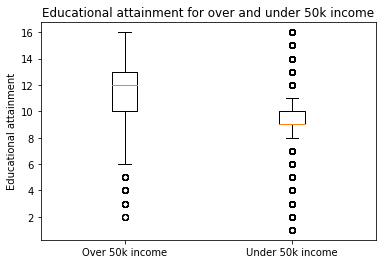

In [98]:
graph = [education_over_50k, education_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Educational attainment for over and under 50k income")
ax1.set_ylabel("Educational attainment")
ax1.boxplot(graph, labels=labels)
plt.show()

## Step 3:  Test multiple hypotheses and provide observations and insights to the following:

#### AGE

1. The older an individual is, the bigger their chances of having a higher income. And can this be explained by the fact that the older one gets, the more experienced professionally they become and this usually means a higher salary? 

#### WORK WEEK

2.	Do people who earn more than 50K tend to work for hours than those that earn less than 50K? Do men work more hours per week than women at all ages? At what age does the working hours per week decrease and by how much?

#### WORK CLASS

3.	Most people are employed in the private sector. Do people in the private sector earn more than the other work classes?


## Step 4:  Deliver results